In [ ]:
import easyocr

ModuleNotFoundError: ignored

In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 62 kB/s 
     |████████████████████████████████| 47.7 MB 1.5 MB/s 


In [ ]:
import easyocr

ImportError: ignored

In [ ]:
!pip install opencv-python

In [ ]:
import easyocr

ImportError: ignored

In [ ]:
import cv2

ImportError: ignored

In [ ]:
pip list

Package                       Version
----------------------------- --------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl 

In [ ]:
pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.9 MB/s 


In [ ]:
import cv2

In [ ]:
import easyocr

In [ ]:
from easyocr import Reader

In [ ]:
## There are different type issues - this was due to different version of opencv-python and headless
## opencv is prerequisite for easyocr

In [ ]:
!pip install imutils

In [ ]:
car = cv2.imread('/content/sample_data/NBR_plate.jpg')

In [ ]:
car

array([[[53, 53, 53],
        [41, 41, 41],
        [21, 21, 21],
        ...,
        [44, 54, 61],
        [45, 55, 62],
        [46, 56, 63]],

       [[53, 53, 53],
        [41, 41, 41],
        [21, 21, 21],
        ...,
        [44, 54, 61],
        [44, 54, 61],
        [45, 55, 62]],

       [[52, 52, 52],
        [41, 41, 41],
        [22, 22, 22],
        ...,
        [44, 54, 61],
        [44, 54, 61],
        [44, 54, 61]],

       ...,

       [[ 6,  8,  8],
        [15, 17, 17],
        [20, 22, 22],
        ...,
        [ 6,  8,  8],
        [13, 15, 15],
        [ 8, 10, 10]],

       [[14, 14, 14],
        [17, 19, 19],
        [18, 20, 20],
        ...,
        [14, 18, 19],
        [13, 18, 17],
        [10, 15, 14]],

       [[ 7,  7,  7],
        [11, 13, 13],
        [14, 16, 16],
        ...,
        [13, 17, 18],
        [12, 17, 16],
        [10, 15, 14]]], dtype=uint8)

In [ ]:
car_gray = cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)

In [ ]:
car_gray

array([[53, 41, 21, ..., 55, 56, 57],
       [53, 41, 21, ..., 55, 55, 56],
       [52, 41, 22, ..., 55, 55, 55],
       ...,
       [ 8, 17, 22, ...,  8, 15, 10],
       [14, 19, 20, ..., 18, 17, 14],
       [ 7, 13, 16, ..., 17, 16, 14]], dtype=uint8)

In [ ]:
car.shape,car_gray.shape

((338, 600, 3), (338, 600))

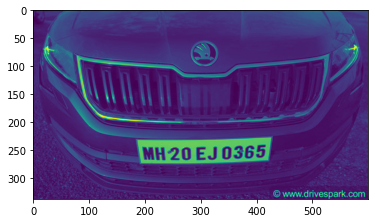

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(car_gray)


In [ ]:
# matplotlib expects image into RGB format .. while cvt reads the image into BGR.
# we will convert the image into RGB for 

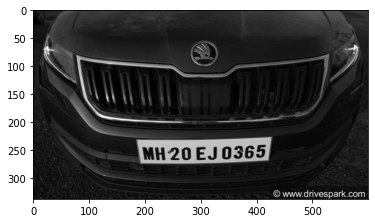

In [ ]:
plt.imshow(cv2.cvtColor(car_gray, cv2.COLOR_BGR2RGB))

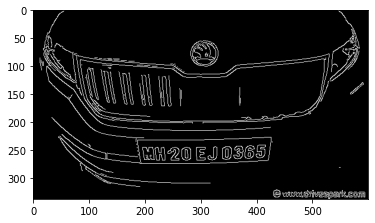

In [ ]:
bfilter = cv2.bilateralFilter(car_gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[426, 228]],

       [[419, 269]],

       [[194, 274]],

       [[187, 241]]], dtype=int32)

In [ ]:
import numpy as np
mask = np.zeros(car_gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(car, car, mask=mask)

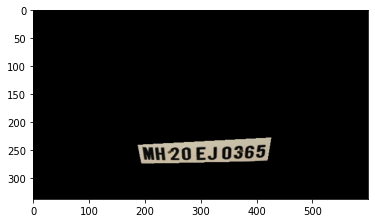

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = car_gray[x1:x2+1, y1:y2+1]

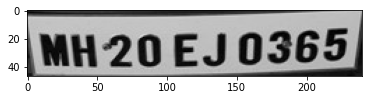

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[4, 8], [235, 8], [235, 47], [4, 47]], 'MH20 EJ 0365', 0.5356236429004932)]

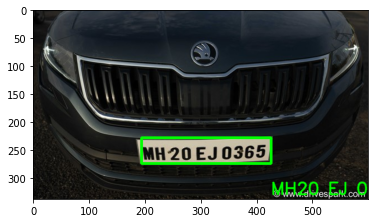

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(car, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(car, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
text

'MH20 EJ 0365'

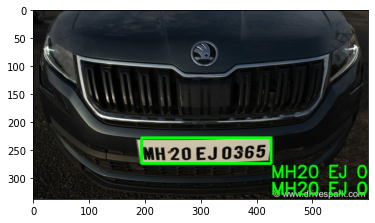

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(car, text=text, org=(approx[0][0][0], approx[0][0][0]+60), fontFace=font, fontScale=0.5, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(car, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))